In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
from google.colab import files

fileupload = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv', sep=';')

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


       age         job   marital  education default  balance housing loan  \
24080   56  technician   married  secondary      no      589     yes   no   
24165   30      admin.   married  secondary      no      873     yes   no   
24239   48      admin.  divorced  secondary      no      295     yes   no   
24264   49  management   married   tertiary      no       64      no   no   
24435   42  technician   married   tertiary      no    14282     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
24080    unknown   23   oct       518         1    147         2  success  yes  
24165  telephone   12   nov       119         1    167         3  success   no  
24239   cellular   17   nov       123         1    164         2  success   no  
24264   cellular   17   nov       208         1    159         1  success   no  
24435   cellular   17   nov        77         1    103         4  success   no  


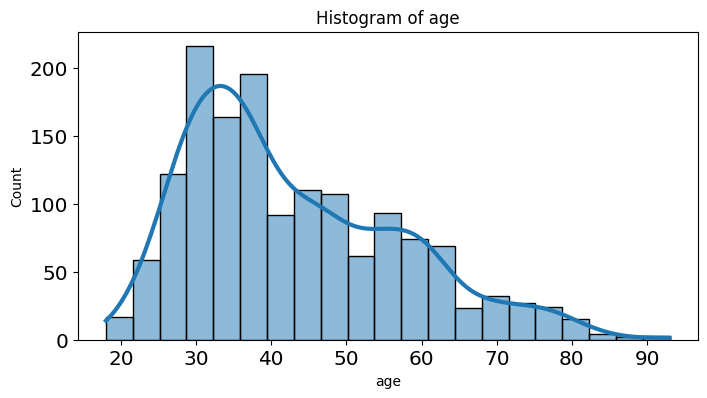

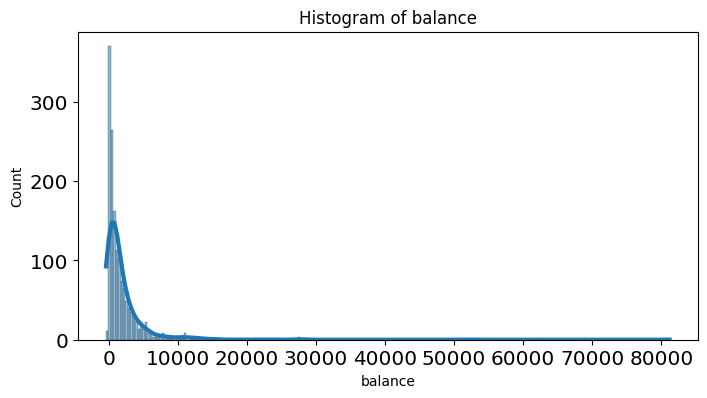

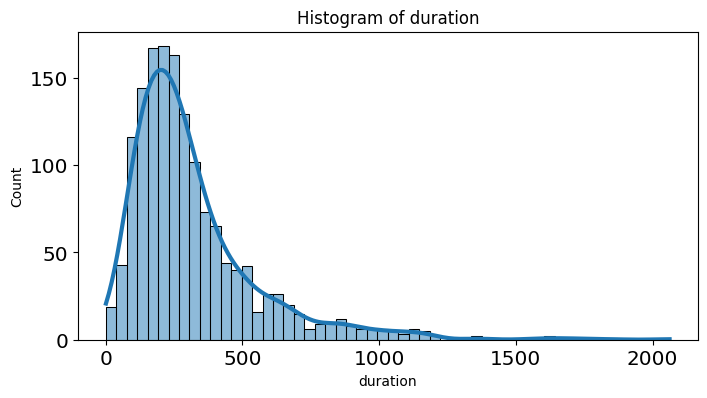

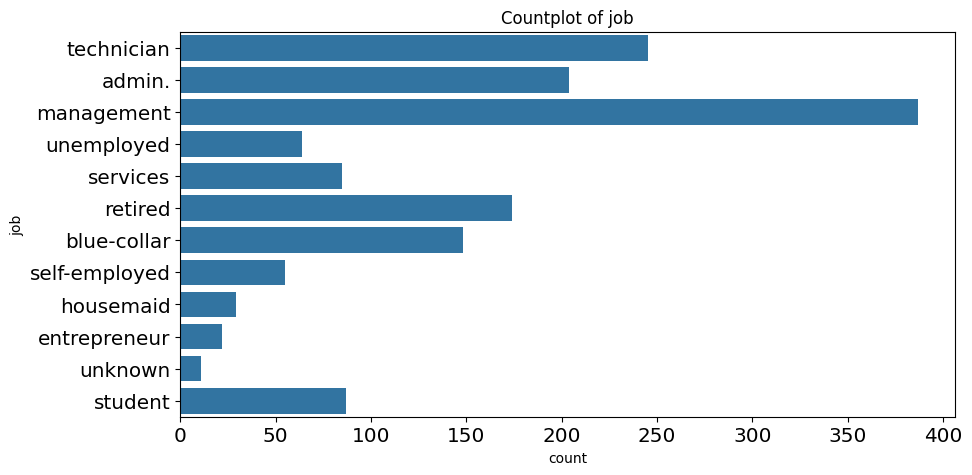

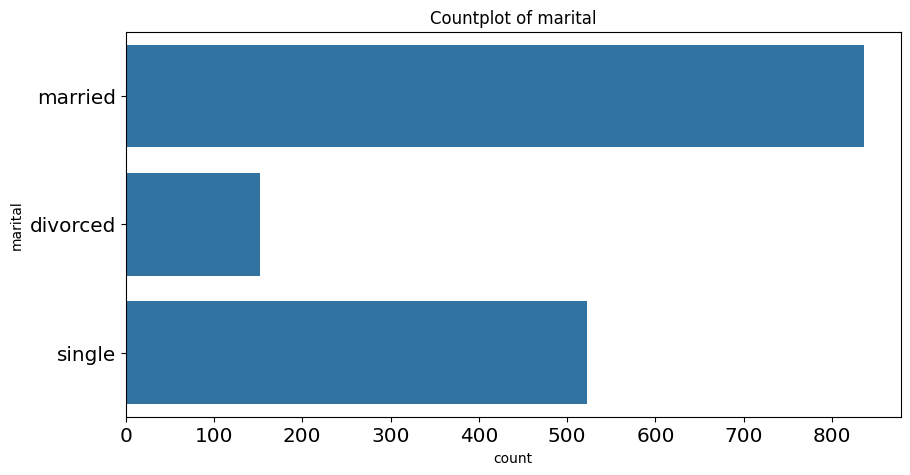

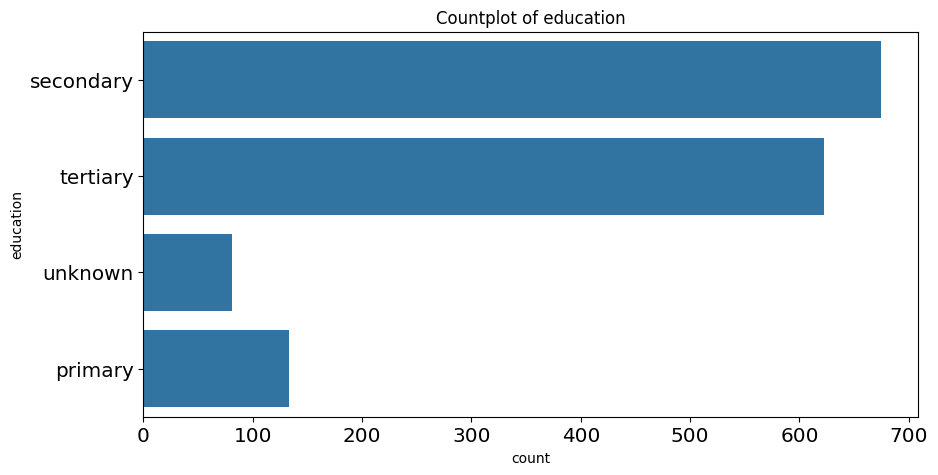

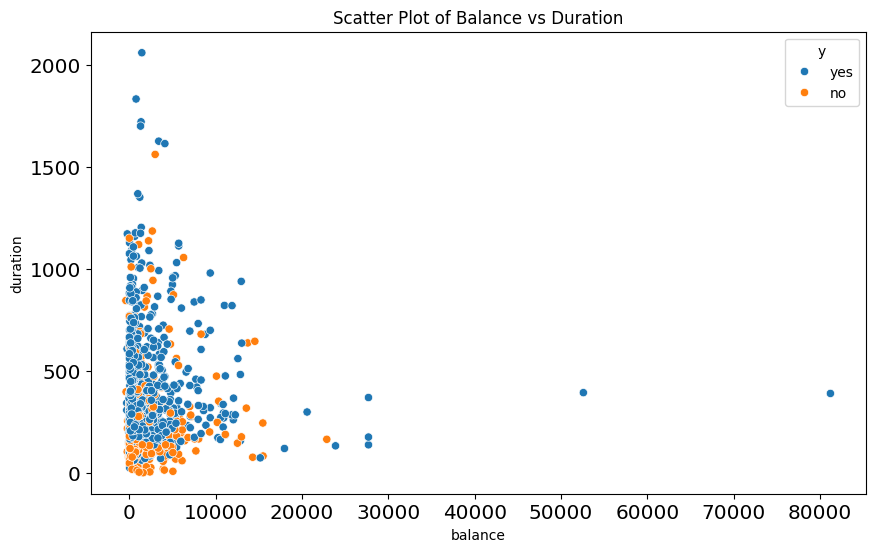

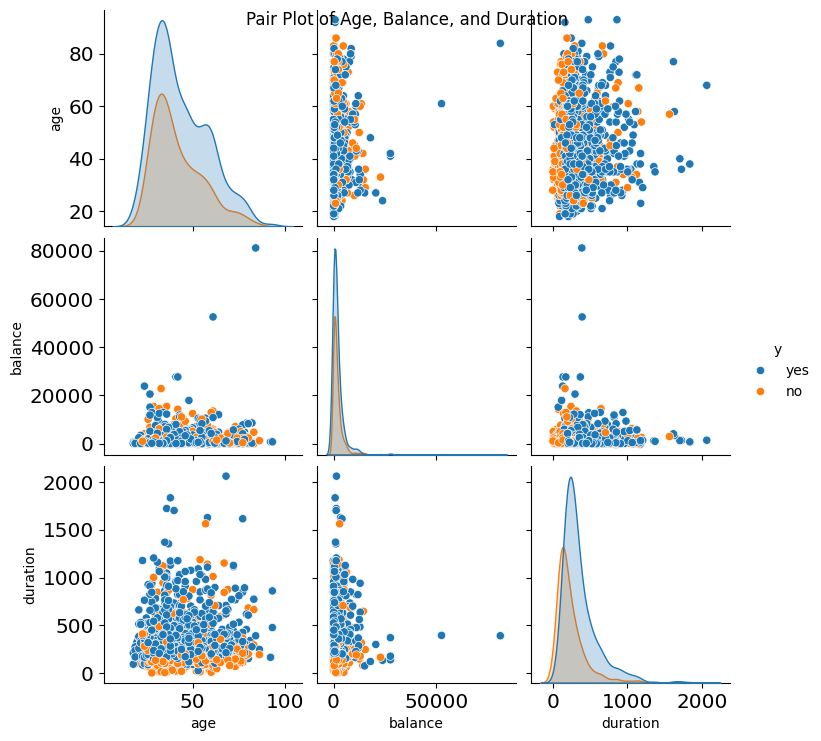

In [ ]:
# Filtering data untuk poutcome='success'
success_df = df[df['poutcome'] == 'success']

# Menampilkan 5 data pertama dari DataFrame yang telah difilter
print(success_df.head())

# EDA (Exploratory Data Analysis)

success_df.describe()
# 1. Univariate Analysis
# -------------------------------
# Histogram untuk variabel numerik (misalnya, 'age', 'balance', 'duration')
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['age', 'balance', 'duration']
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(success_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# Countplot untuk variabel kategorikal (misalnya, 'job', 'marital', 'education')
categorical_columns = ['job', 'marital', 'education']
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=success_df[column])
    plt.title(f'Countplot of {column}')
    plt.show()

# -------------------------------
# 2. Multivariate Analysis
# -------------------------------
# Scatter plot untuk melihat hubungan antara variabel numerik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balance', y='duration', data=success_df, hue='y')
plt.title('Scatter Plot of Balance vs Duration')
plt.show()

# Pair plot untuk melihat hubungan antara beberapa variabel numerik
sns.pairplot(success_df[['age', 'balance', 'duration', 'y']], hue='y')
plt.suptitle('Pair Plot of Age, Balance, and Duration')
plt.show()

#Korelasi Numerical To Categorical

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome','y']
nums = ['age', 'balance', 'campaign', 'pdays', 'previous']
timestamp = ['day', 'month', 'duration']

In [ ]:
from scipy.stats import f_oneway

# Pisahkan data berdasarkan kategori target
for feature in ['age', 'balance', 'campaign', 'pdays', 'previous']:
    grouped_data = [df[feature][df['y'] == category] for category in df['y'].unique()]

    # Lakukan uji ANOVA
    anova_result = f_oneway(*grouped_data)

    # Tampilkan hasil uji ANOVA
    print(f"Hasil Uji ANOVA untuk {feature}:")
    print("Statistik Uji F:", anova_result.statistic)
    print("p-value:", anova_result.pvalue)

    # Interpretasi hasil uji ANOVA
    if anova_result.pvalue < 0.05:
        print(f"Terdapat perbedaan signifikan dalam rata-rata {feature} antara kelompok target.")
    else:
        print(f"Tidak terdapat perbedaan signifikan dalam rata-rata {feature} antara kelompok target.")


Hasil Uji ANOVA untuk age:
Statistik Uji F: 28.625233091728465
p-value: 8.825643691900577e-08
Terdapat perbedaan signifikan dalam rata-rata age antara kelompok target.
Hasil Uji ANOVA untuk balance:
Statistik Uji F: 126.57227551143087
p-value: 2.5211136918594683e-29
Terdapat perbedaan signifikan dalam rata-rata balance antara kelompok target.
Hasil Uji ANOVA untuk campaign:
Statistik Uji F: 243.3584044347332
p-value: 1.0123473642068786e-54
Terdapat perbedaan signifikan dalam rata-rata campaign antara kelompok target.
Hasil Uji ANOVA untuk pdays:
Statistik Uji F: 490.69656268092456
p-value: 3.79055331945749e-108
Terdapat perbedaan signifikan dalam rata-rata pdays antara kelompok target.
Hasil Uji ANOVA untuk previous:
Statistik Uji F: 396.4439894423845
p-value: 7.801830349772383e-88
Terdapat perbedaan signifikan dalam rata-rata previous antara kelompok target.


Feature Selection:

Jika uji ANOVA menunjukkan perbedaan signifikan untuk suatu fitur, Anda dapat mempertimbangkan fitur tersebut untuk dimasukkan ke dalam analisis atau model lebih lanjut.

# Handle missing values

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat missing values pada dataset

In [ ]:
missing_data = df[(df['poutcome'] == 'unknown') & (df['pdays'] != -1)]

missing_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40658,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,yes
41821,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,no
42042,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,yes
43978,30,technician,single,secondary,no,254,yes,yes,cellular,24,jun,167,3,416,2,unknown,no
45021,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,no


In [ ]:
mask = ~((df['poutcome'] == 'unknown') & (df['pdays'] != -1))

df = df[mask]

Hapus data unknown yang missing values dari poutcome dan tinggalkan unknown yang client belum pernah dikontak

In [ ]:
df['poutcome'].replace({'unknown': 'never'}, inplace=True)

<ipython-input-14-373e7950109a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poutcome'].replace({'unknown': 'never'}, inplace=True)


### Mengganti nilai unknown pada fitur contact dengan modus

In [ ]:
# Mengganti nilai unknown dengan modus
modus_contact = df['contact'].mode()[0]
df['contact'] = df['contact'].replace('unknown', modus_contact)

<ipython-input-15-e74d8791c11b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact'] = df['contact'].replace('unknown', modus_contact)


In [ ]:
df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,never,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,never,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,never,no
3,47,blue-collar,married,unknown,no,1506,yes,no,cellular,5,may,92,1,-1,0,never,no
4,33,unknown,single,unknown,no,1,no,no,cellular,5,may,198,1,-1,0,never,no


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9456
technician       7596
admin.           5170
services         4154
retired          2263
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27211
single      12788
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23199
tertiary     13299
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44391
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25128
no     20078
Name: housing, dtype: int64

Value count kolom loan:
no     37964
yes     7242
Name: loan, dtype: int64

Value count kolom contact:
cellular     42300
telephone     2906
Name: contact, dtype: int64

Value count kolom poutcome:
never      36954
failure     4901
other       1840
success     1511
Name: poutco

# Handle duplicated data

In [ ]:
df.duplicated().sum()

0

Tidak terdapat duplicated values pada dataset

# Handle outliers

In [ ]:
nums2 = ['age','campaign']
for num in nums2:
  df[num] = np.log(df[num])


In [ ]:
from scipy import stats

print("Before removing outlier: ", len(df))

for num in nums2:
  z_scores = np.abs(stats.zscore(df[num]))
  df = df[z_scores < 3]

print("After removing outlier: ", len(df))

Before removing outlier:  45206
After removing outlier:  44785


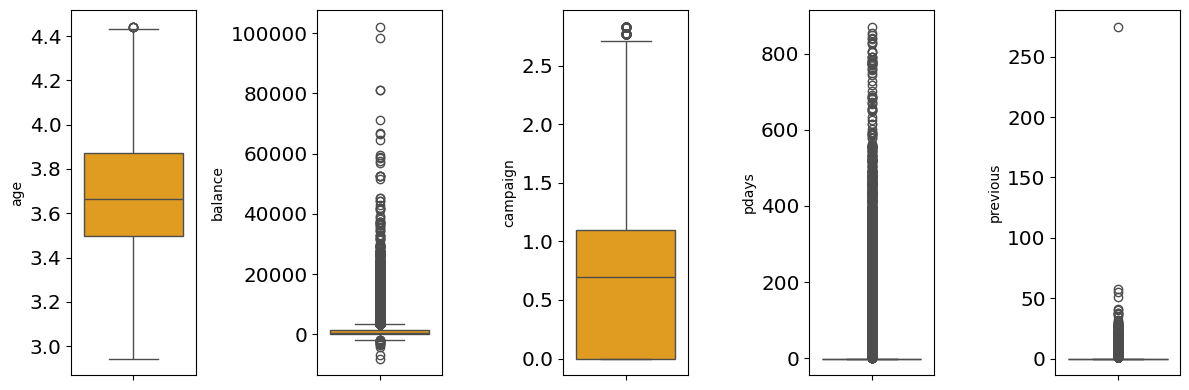

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='orange', orient='v')
    plt.tight_layout()

# Feature transformation

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop(['y'], axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(f'Number of Train Data: {y_train.shape[0]}')
print(f'Number of Test Data: {y_test.shape[0]}')


Number of Train Data: 35828
Number of Test Data: 8957


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['age', 'balance', 'campaign', 'pdays', 'previous']
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])
print("DataFrame setelah distandardisasi:")
X_train.head()

DataFrame setelah distandardisasi:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
21317,1.361460,blue-collar,married,primary,no,0.600859,no,no,cellular,18,aug,129,0.605778,-0.413502,-0.24294,never
312,1.290341,services,divorced,primary,no,-0.414293,yes,yes,cellular,5,may,311,0.007243,-0.413502,-0.24294,never
10060,0.753023,entrepreneur,married,secondary,no,-0.260225,no,no,cellular,11,jun,148,1.030445,-0.413502,-0.24294,never
34801,0.585039,entrepreneur,married,tertiary,no,7.781351,yes,yes,cellular,6,may,72,-1.015958,-0.413502,-0.24294,never
7916,-0.972674,unemployed,divorced,primary,no,-0.445629,yes,no,cellular,30,may,745,2.652181,-0.413502,-0.24294,never


In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1864,-1.374413,technician,single,secondary,no,-0.486431,yes,no,cellular,9,may,67,0.605778,-0.413502,-0.242940,never
36097,0.834408,admin.,divorced,secondary,no,-0.514829,yes,yes,cellular,11,may,469,-1.015958,3.070077,0.171243,failure
3548,0.225970,technician,single,secondary,no,-0.000398,yes,no,cellular,15,may,1867,1.628979,-0.413502,-0.242940,never
35615,-1.666920,technician,married,secondary,no,-0.276546,yes,no,cellular,7,may,189,0.605778,-0.413502,-0.242940,never
22787,-0.972674,management,married,tertiary,no,0.420025,no,no,cellular,25,aug,9,2.227514,-0.413502,-0.242940,never


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44785 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44785 non-null  float64
 1   job        44785 non-null  object 
 2   marital    44785 non-null  object 
 3   education  44785 non-null  object 
 4   default    44785 non-null  object 
 5   balance    44785 non-null  int64  
 6   housing    44785 non-null  object 
 7   loan       44785 non-null  object 
 8   contact    44785 non-null  object 
 9   day        44785 non-null  int64  
 10  month      44785 non-null  object 
 11  duration   44785 non-null  int64  
 12  campaign   44785 non-null  float64
 13  pdays      44785 non-null  int64  
 14  previous   44785 non-null  int64  
 15  poutcome   44785 non-null  object 
 16  y          44785 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 6.2+ MB


# Feature encoding

cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome','y']

In [ ]:
mapping_default = {
    'no' : 0,
    'yes' : 1,
    }
X_train['default'] = X_train['default'].map(mapping_default)
X_test['default'] = X_test['default'].map(mapping_default)

In [ ]:
mapping_housing = {
    'no' : 0,
    'yes' : 1,
    }
X_train['housing'] = X_train['housing'].map(mapping_housing)
X_test['housing'] = X_test['housing'].map(mapping_housing)

In [ ]:
mapping_loan = {
    'no' : 0,
    'yes' : 1,
    }
X_train['loan'] = X_train['loan'].map(mapping_loan)
X_test['loan'] = X_test['loan'].map(mapping_loan)

In [ ]:
X_train_encoded_education = pd.get_dummies(X_train['education'], prefix = 'pendidikan')
X_test_encoded_education = pd.get_dummies(X_test['education'], prefix = 'pendidikan')

In [ ]:
X_train_encoded_kerja = pd.get_dummies(X_train['job'], prefix = 'kerja')
X_test_encoded_kerja = pd.get_dummies(X_test['job'], prefix = 'kerja')

In [ ]:
X_train_encoded_marital = pd.get_dummies(X_train['marital'], prefix = 'status')
X_test_encoded_marital = pd.get_dummies(X_test['marital'], prefix = 'status')

In [ ]:
X_train_encoded_contact = pd.get_dummies(X_train['contact'], prefix = 'contact')
X_test_encoded_contact = pd.get_dummies(X_test['contact'], prefix = 'contact')

In [ ]:
X_train_encoded_poutcome = pd.get_dummies(X_train['poutcome'], prefix = 'poutcome')
X_test_encoded_poutcome = pd.get_dummies(X_test['poutcome'], prefix = 'poutcome')

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
21317,1.361460,blue-collar,married,primary,0,0.600859,0,0,cellular,18,aug,129,0.605778,-0.413502,-0.24294,never
312,1.290341,services,divorced,primary,0,-0.414293,1,1,cellular,5,may,311,0.007243,-0.413502,-0.24294,never
10060,0.753023,entrepreneur,married,secondary,0,-0.260225,0,0,cellular,11,jun,148,1.030445,-0.413502,-0.24294,never
34801,0.585039,entrepreneur,married,tertiary,0,7.781351,1,1,cellular,6,may,72,-1.015958,-0.413502,-0.24294,never
7916,-0.972674,unemployed,divorced,primary,0,-0.445629,1,0,cellular,30,may,745,2.652181,-0.413502,-0.24294,never


In [ ]:
X_train_combined = pd.concat([X_train, X_train_encoded_education, X_train_encoded_kerja,X_train_encoded_marital,X_train_encoded_contact, X_train_encoded_poutcome], axis=1)
X_test_combined = pd.concat([X_test, X_test_encoded_education, X_test_encoded_kerja,X_test_encoded_marital,X_test_encoded_contact, X_test_encoded_poutcome], axis=1)

In [ ]:
X_train_combined = X_train_combined.drop(['job','education', 'marital','contact','month','poutcome'], axis=1)

In [ ]:
X_test_combined = X_test_combined.drop(['job','education','marital','contact','month','poutcome'], axis=1)

In [ ]:
X_train_combined.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,kerja_unknown,status_divorced,status_married,status_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_never,poutcome_other,poutcome_success
21317,1.361460,0,0.600859,0,0,18,129,0.605778,-0.413502,-0.24294,...,0,0,1,0,1,0,0,1,0,0
312,1.290341,0,-0.414293,1,1,5,311,0.007243,-0.413502,-0.24294,...,0,1,0,0,1,0,0,1,0,0
10060,0.753023,0,-0.260225,0,0,11,148,1.030445,-0.413502,-0.24294,...,0,0,1,0,1,0,0,1,0,0
34801,0.585039,0,7.781351,1,1,6,72,-1.015958,-0.413502,-0.24294,...,0,0,1,0,1,0,0,1,0,0
7916,-0.972674,0,-0.445629,1,0,30,745,2.652181,-0.413502,-0.24294,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
X_train_combined.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'pendidikan_primary',
       'pendidikan_secondary', 'pendidikan_tertiary', 'pendidikan_unknown',
       'kerja_admin.', 'kerja_blue-collar', 'kerja_entrepreneur',
       'kerja_housemaid', 'kerja_management', 'kerja_retired',
       'kerja_self-employed', 'kerja_services', 'kerja_student',
       'kerja_technician', 'kerja_unemployed', 'kerja_unknown',
       'status_divorced', 'status_married', 'status_single',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_never', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [ ]:
X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35828 entries, 21317 to 15947
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   35828 non-null  float64
 1   default               35828 non-null  int64  
 2   balance               35828 non-null  float64
 3   housing               35828 non-null  int64  
 4   loan                  35828 non-null  int64  
 5   day                   35828 non-null  int64  
 6   duration              35828 non-null  int64  
 7   campaign              35828 non-null  float64
 8   pdays                 35828 non-null  float64
 9   previous              35828 non-null  float64
 10  pendidikan_primary    35828 non-null  uint8  
 11  pendidikan_secondary  35828 non-null  uint8  
 12  pendidikan_tertiary   35828 non-null  uint8  
 13  pendidikan_unknown    35828 non-null  uint8  
 14  kerja_admin.          35828 non-null  uint8  
 15  kerja_blue-coll

<Axes: >

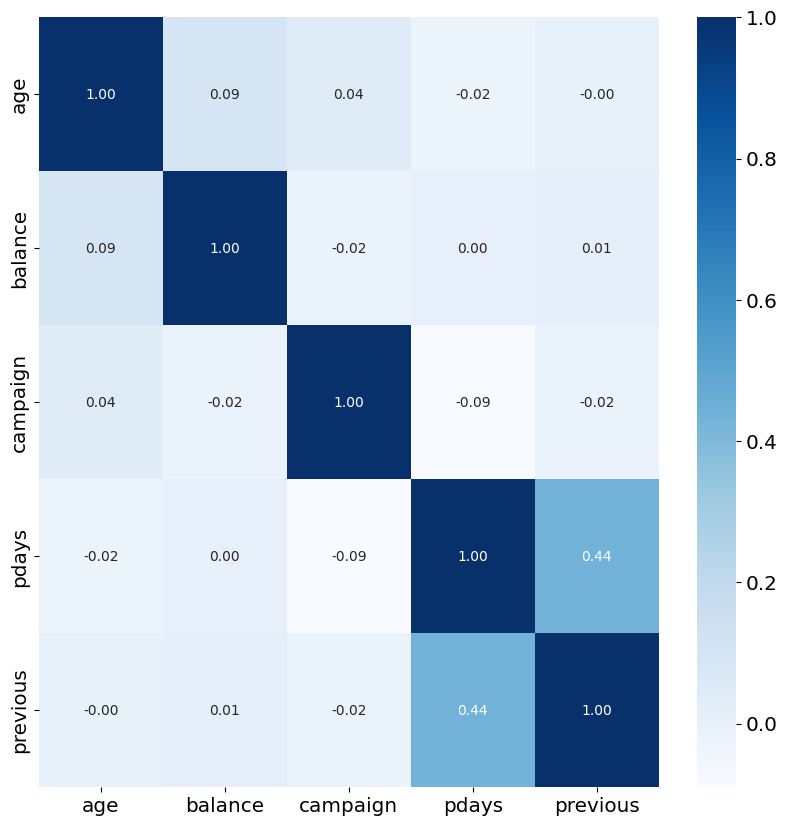

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_combined[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
cats2 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome']

<Axes: >

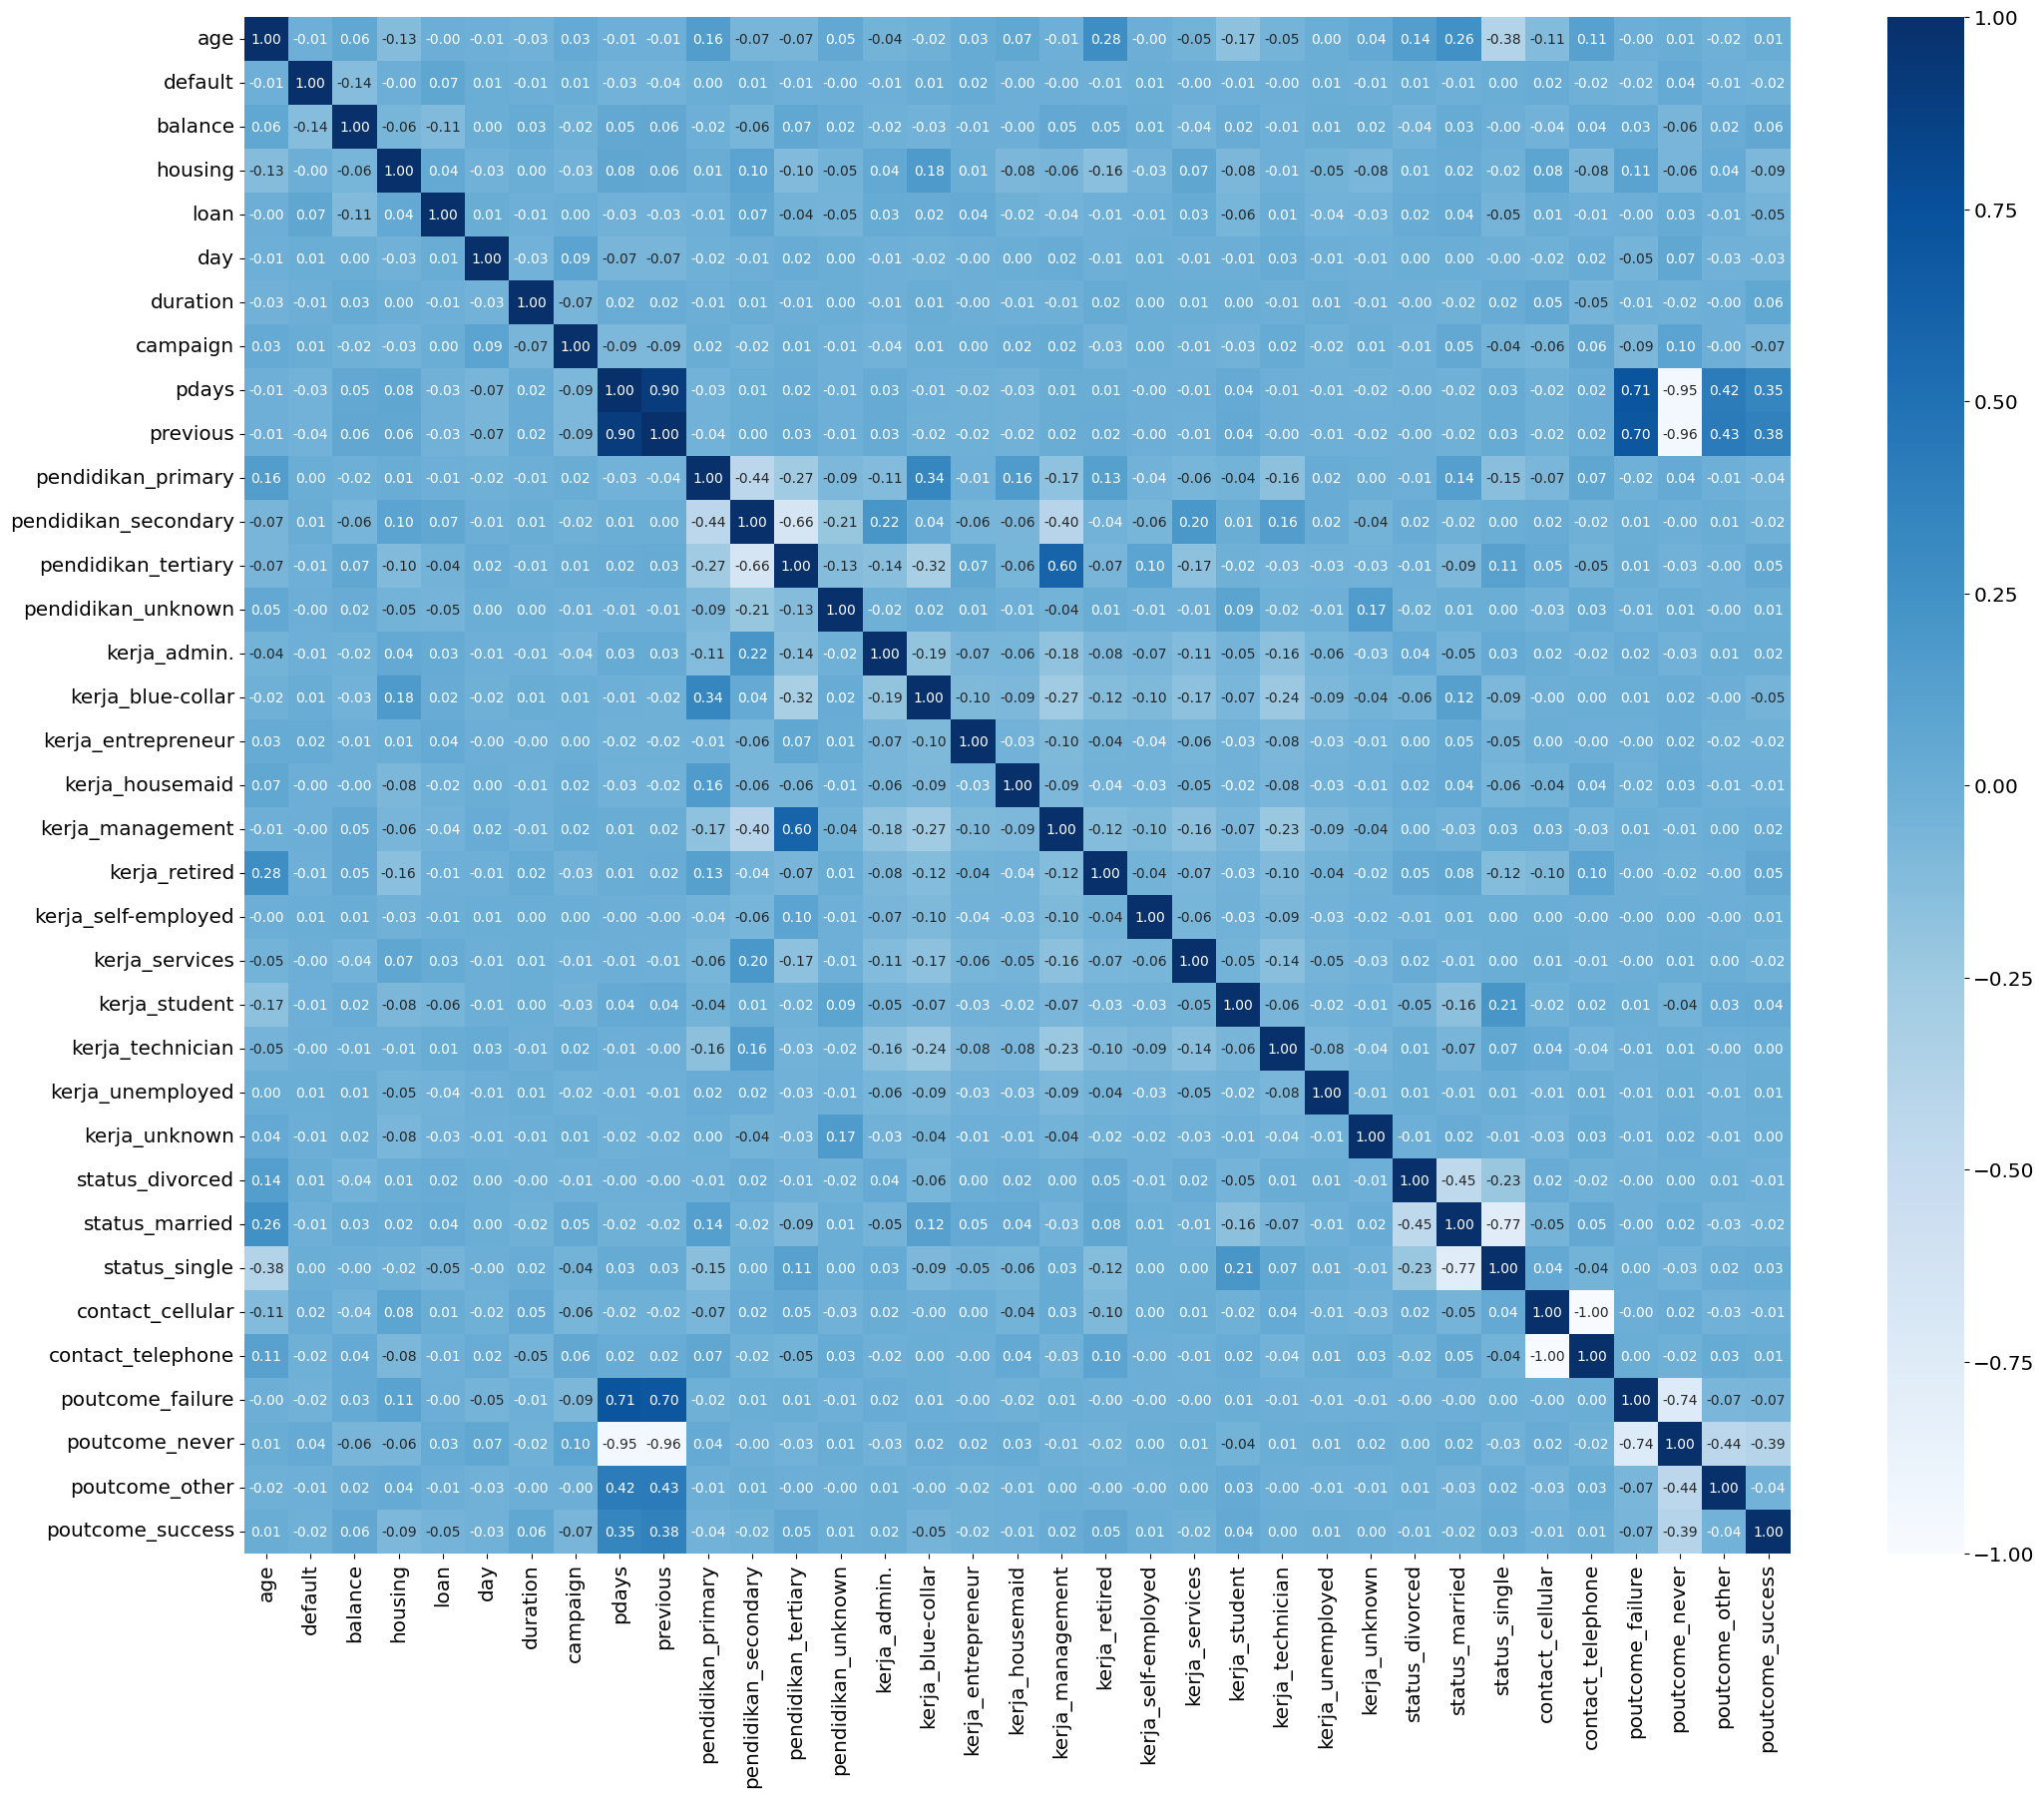

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(X_train_combined.corr(method='kendall'), cmap='Blues', annot=True, fmt='.2f')

# Handle class imbalance

In [ ]:
y_train.value_counts()

no     31599
yes     4229
Name: y, dtype: int64

In [ ]:
# OVERSAMPLING
from imblearn import over_sampling
X_oversampling , y_oversampling = over_sampling.SMOTE(random_state=42).fit_resample(X_train_combined,y_train)
print(pd.Series(y_oversampling).value_counts())

no     31599
yes    31599
Name: y, dtype: int64


 Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

# Inisialisasi model
logreg_model = LogisticRegression(max_iter=1000)  # Menambahkan max_iter untuk mengatasi konvergensi
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()

# Model Dictionary
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Adaboost': adaboost_model
}

# Evaluasi setiap model
for model_name, model in models.items():
    # Training model
    model.fit(X_train_combined, y_train)

    # Prediksi pada data test
    y_pred_test = model.predict(X_test_combined)
    y_pred_train = model.predict(X_train_combined)

    # AUC Score untuk data test (jika model mendukung predict_proba)
    if hasattr(model, 'predict_proba'):
        y_pred_proba_test = model.predict_proba(X_test_combined)[:, 1]
        auc_test = roc_auc_score(y_test, y_pred_proba_test)
    else:
        auc_test = None

    # AUC Score untuk data train (jika model mendukung predict_proba)
    if hasattr(model, 'predict_proba'):
        y_pred_proba_train = model.predict_proba(X_train_combined)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_proba_train)
    else:
        auc_train = None

    # Evaluasi metrik pada data test
    accuracy_test = accuracy_score(y_test, y_pred_test)
    classification_report_test = classification_report(y_test, y_pred_test)

    # Evaluasi metrik pada data train
    accuracy_train = accuracy_score(y_train, y_pred_train)
    classification_report_train = classification_report(y_train, y_pred_train)

    # Menampilkan hasil evaluasi
    print(f'{model_name} Evaluation:\n{"-"*50}\n')
    print(f'Train Accuracy: {accuracy_train:.2f}\nTrain Classification Report:\n{classification_report_train}\n')
    print(f'Test Accuracy: {accuracy_test:.2f}\nTest Classification Report:\n{classification_report_test}\n')
    if auc_train is not None:
        print(f'Train AUC Score: {auc_train:.2f}\nTest AUC Score: {auc_test:.2f}\n{"="*70}\n')
    else:
        print('Model does not support predict_proba.\n{"="*70}\n')

Logistic Regression Evaluation:
--------------------------------------------------

Train Accuracy: 0.90
Train Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     31599
         yes       0.65      0.32      0.43      4229

    accuracy                           0.90     35828
   macro avg       0.78      0.65      0.69     35828
weighted avg       0.88      0.90      0.88     35828


Test Accuracy: 0.90
Test Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7925
         yes       0.64      0.32      0.43      1032

    accuracy                           0.90      8957
   macro avg       0.78      0.65      0.69      8957
weighted avg       0.88      0.90      0.89      8957


Train AUC Score: 0.89
Test AUC Score: 0.88

Decision Tree Evaluation:
--------------------------------------------------

Train Accuracy: 1.00
Train Classificatio

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Inisialisasi model XGBoost dengan konversi nilai kelas
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
y_train_binary_xgb = y_train.replace({'yes': 1, 'no': 0})
xgb_model.fit(X_train_combined, y_train_binary_xgb)

# Prediksi pada data test dan train
y_pred_test_xgb = xgb_model.predict(X_test_combined)
y_pred_train_xgb = xgb_model.predict(X_train_combined)

# Menentukan variabel y_train_binary sesuai dengan label biner yang diharapkan
y_test_binary_xgb = y_test.replace({'yes': 1, 'no': 0})
y_train_binary = y_train.replace({'yes': 1, 'no': 0})

# Mengecek apakah model mendukung predict_proba
if hasattr(xgb_model, 'predict_proba'):
    y_pred_proba_test_xgb = xgb_model.predict_proba(X_test_combined)[:, 1]
    auc_test_xgb = roc_auc_score(y_test_binary_xgb, y_pred_proba_test_xgb)
else:
    auc_test_xgb = None

# AUC Score untuk data train
y_pred_proba_train_xgb = xgb_model.predict_proba(X_train_combined)[:, 1]
auc_train_xgb = roc_auc_score(y_train_binary, y_pred_proba_train_xgb)

# Evaluasi metrik pada data test
accuracy_test_xgb = accuracy_score(y_test_binary_xgb, y_pred_test_xgb)
classification_report_test_xgb = classification_report(y_test_binary_xgb, y_pred_test_xgb)

# Evaluasi metrik pada data train
accuracy_train_xgb = accuracy_score(y_train_binary_xgb, y_pred_train_xgb)
classification_report_train_xgb = classification_report(y_train_binary_xgb, y_pred_train_xgb)

# Menampilkan hasil evaluasi
print('XGBoost Evaluation:\n{"-"*50}\n')
print(f'Train Accuracy: {accuracy_train_xgb:.2f}\nTrain Classification Report:\n{classification_report_train_xgb}\n')
print(f'Test Accuracy: {accuracy_test_xgb:.2f}\nTest Classification Report:\n{classification_report_test_xgb}\n')
print(f'Train AUC Score: {auc_train_xgb:.2f}\nTest AUC Score: {auc_test_xgb:.2f}\n{"="*70}\n')

XGBoost Evaluation:
{"-"*50}

Train Accuracy: 0.95
Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     31599
           1       0.88      0.64      0.74      4229

    accuracy                           0.95     35828
   macro avg       0.92      0.81      0.85     35828
weighted avg       0.94      0.95      0.94     35828


Test Accuracy: 0.90
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7925
           1       0.58      0.41      0.48      1032

    accuracy                           0.90      8957
   macro avg       0.75      0.69      0.71      8957
weighted avg       0.89      0.90      0.89      8957


Train AUC Score: 0.97
Test AUC Score: 0.89



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# B. Modeling:
model = RandomForestClassifier()
model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [ ]:
# C. Model Evaluation:
y_pred_test = model.predict(X_test_combined)

# Evaluasi metrik pada data test
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)

print(f'Model Evaluation on Test Data:\nAccuracy: {accuracy_test:.2f}\nClassification Report:\n{classification_report_test}')

Model Evaluation on Test Data:
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7925
         yes       0.61      0.33      0.43      1032

    accuracy                           0.90      8957
   macro avg       0.76      0.65      0.69      8957
weighted avg       0.88      0.90      0.89      8957



In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi model Logistic Regression dengan penyesuaian
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()

# Model Dictionary
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Adaboost': adaboost_model
}

# Scaling data
scaler = StandardScaler()
X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_test_combined_scaled = scaler.transform(X_test_combined)

# Menentukan variabel y_train_binary_models sesuai dengan label biner yang diharapkan
y_train_binary_models = y_train.replace({'yes': 1, 'no': 0})

# Cross-Validation untuk model lainnya
for model_name, model in models.items():
    cross_val_scores = cross_val_score(model, X_train_combined_scaled, y_train_binary_models, cv=5)

    print(f'{model_name} Cross-Validation Scores: {cross_val_scores}')
    print(f'{model_name} Mean Cross-Validation Accuracy: {cross_val_scores.mean():.2f}\n{"-"*50}')

# Cross-Validation untuk XGBoost
xgb_cross_val_scores = cross_val_score(xgb_model, X_train_combined_scaled, y_train_binary_xgb, cv=5)

print(f'XGBoost Cross-Validation Scores: {xgb_cross_val_scores}')
print(f'XGBoost Mean Cross-Validation Accuracy: {xgb_cross_val_scores.mean():.2f}\n{"="*70}\n')

Logistic Regression Cross-Validation Scores: [0.89757187 0.89743232 0.90022328 0.9034194  0.89825541]
Logistic Regression Mean Cross-Validation Accuracy: 0.90
--------------------------------------------------
Decision Tree Cross-Validation Scores: [0.86059168 0.86212671 0.85989394 0.86127006 0.8559665 ]
Decision Tree Mean Cross-Validation Accuracy: 0.86
--------------------------------------------------
Random Forest Cross-Validation Scores: [0.89840915 0.90231649 0.89840915 0.90062805 0.89672017]
Random Forest Mean Cross-Validation Accuracy: 0.90
--------------------------------------------------
Adaboost Cross-Validation Scores: [0.8953391  0.89408317 0.89519955 0.89937195 0.89825541]
Adaboost Mean Cross-Validation Accuracy: 0.90
--------------------------------------------------
XGBoost Cross-Validation Scores: [0.8985487  0.89924644 0.89771142 0.89951151 0.897418  ]
XGBoost Mean Cross-Validation Accuracy: 0.90



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi model Logistic Regression dengan penyesuaian
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()

# Model Dictionary
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Adaboost': adaboost_model
}

# Scaling data
scaler = StandardScaler()
X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_test_combined_scaled = scaler.transform(X_test_combined)

# Konversi label menjadi numerik untuk Logistic Regression
label_encoder = LabelEncoder()
y_train_binary_models = label_encoder.fit_transform(y_train)
y_test_binary_models = label_encoder.transform(y_test)

# Hyperparameter Tuning untuk model lainnya
for model_name, model in models.items():
    param_grid = {}  # Definisikan parameter grid sesuai dengan model

    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_combined_scaled, y_train_binary_models)

    best_params = grid_search.best_params_

    print(f'Best Hyperparameters for {model_name}: {best_params}')

    # Melatih model dengan hyperparameter terbaik
    best_model = grid_search.best_estimator_
    best_model.fit(X_train_combined_scaled, y_train_binary_models)

    # Evaluasi model setelah hyperparameter tuning pada data test
    y_pred_test_tuned = best_model.predict(X_test_combined_scaled)
    accuracy_test_tuned = accuracy_score(y_test_binary_models, y_pred_test_tuned)
    classification_report_test_tuned = classification_report(y_test_binary_models, y_pred_test_tuned)

    print(f'{model_name} Evaluation on Test Data after Hyperparameter Tuning:\nAccuracy: {accuracy_test_tuned:.2f}\nClassification Report:\n{classification_report_test_tuned}\n{"-"*50}')

Best Hyperparameters for Logistic Regression: {}
Logistic Regression Evaluation on Test Data after Hyperparameter Tuning:
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7925
           1       0.64      0.32      0.43      1032

    accuracy                           0.90      8957
   macro avg       0.78      0.65      0.69      8957
weighted avg       0.89      0.90      0.89      8957

--------------------------------------------------
Best Hyperparameters for Decision Tree: {}
Decision Tree Evaluation on Test Data after Hyperparameter Tuning:
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7925
           1       0.39      0.40      0.40      1032

    accuracy                           0.86      8957
   macro avg       0.66      0.66      0.66      8957
weighted avg       0.86      0.86      0.8

In [ ]:
# Hyperparameter Tuning untuk XGBoost
param_grid_xgb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 9]}
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train_combined_scaled, y_train_binary_xgb)

best_params_xgb = grid_search_xgb.best_params_

print(f'Best Hyperparameters for XGBoost: {best_params_xgb}')

# Melatih model XGBoost dengan hyperparameter terbaik
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb.fit(X_train_combined_scaled, y_train_binary_xgb)

# Convert true labels to numeric
y_test_numeric = y_test.replace({'no': 0, 'yes': 1})

# Evaluasi model XGBoost setelah hyperparameter tuning pada data test
y_pred_test_tuned_xgb = best_model_xgb.predict(X_test_combined_scaled)

# Menampilkan hasil evaluasi model XGBoost setelah hyperparameter tuning pada data test
print(f'XGBoost Evaluation on Test Data after Hyperparameter Tuning:\n')
print(f'Accuracy: {accuracy_score(y_test_numeric, y_pred_test_tuned_xgb):.2f}')
print(f'Classification Report:\n{classification_report(y_test_numeric, y_pred_test_tuned_xgb)}')

Best Hyperparameters for XGBoost: {'max_depth': 3, 'n_estimators': 100}
XGBoost Evaluation on Test Data after Hyperparameter Tuning:

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7925
           1       0.62      0.40      0.49      1032

    accuracy                           0.90      8957
   macro avg       0.77      0.68      0.72      8957
weighted avg       0.89      0.90      0.89      8957



In [ ]:
from sklearn.metrics import roc_auc_score

# AUC Score untuk data test setelah hyperparameter tuning
y_pred_proba_test_tuned_xgb = best_model_xgb.predict_proba(X_test_combined_scaled)[:, 1]
auc_test_tuned_xgb = roc_auc_score(y_test_numeric, y_pred_proba_test_tuned_xgb)

# AUC Score untuk data train setelah hyperparameter tuning
y_pred_proba_train_tuned_xgb = best_model_xgb.predict_proba(X_train_combined_scaled)[:, 1]
auc_train_tuned_xgb = roc_auc_score(y_train_binary_xgb, y_pred_proba_train_tuned_xgb)

# Menampilkan hasil evaluasi AUC Score
print(f'AUC Score for XGBoost on Test Data after Hyperparameter Tuning: {auc_test_tuned_xgb:.2f}')
print(f'AUC Score for XGBoost on Train Data after Hyperparameter Tuning: {auc_train_tuned_xgb:.2f}\n')

AUC Score for XGBoost on Test Data after Hyperparameter Tuning: 0.90
AUC Score for XGBoost on Train Data after Hyperparameter Tuning: 0.92



In [ ]:
# Sebelum Hyperparameter Tuning - Logistic Regression
from sklearn.linear_model import LogisticRegression

# Convert true labels to numeric
y_train_binary_lr = y_train.replace({'no': 0, 'yes': 1})

# Hyperparameter Tuning untuk Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_combined_scaled, y_train_binary_lr)

best_params_lr = grid_search_lr.best_params_

print(f'Best Hyperparameters for Logistic Regression: {best_params_lr}')

# Melatih model Logistic Regression dengan hyperparameter terbaik
best_model_lr = grid_search_lr.best_estimator_
best_model_lr.fit(X_train_combined_scaled, y_train_binary_lr)

# Evaluasi model Logistic Regression setelah hyperparameter tuning pada data test
y_pred_test_tuned_lr = best_model_lr.predict(X_test_combined_scaled)

# Menampilkan hasil evaluasi model Logistic Regression setelah hyperparameter tuning pada data test
print(f'Logistic Regression Evaluation on Test Data after Hyperparameter Tuning:\n')
print(f'Accuracy: {accuracy_score(y_test_numeric, y_pred_test_tuned_lr):.2f}')
print(f'Classification Report:\n{classification_report(y_test_numeric, y_pred_test_tuned_lr)}')

# AUC Score untuk data test setelah hyperparameter tuning
y_pred_proba_test_tuned_lr = best_model_lr.predict_proba(X_test_combined_scaled)[:, 1]
auc_test_tuned_lr = roc_auc_score(y_test_numeric, y_pred_proba_test_tuned_lr)

# AUC Score untuk data train setelah hyperparameter tuning
y_pred_proba_train_tuned_lr = best_model_lr.predict_proba(X_train_combined_scaled)[:, 1]
auc_train_tuned_lr = roc_auc_score(y_train_binary_lr, y_pred_proba_train_tuned_lr)

# Menampilkan hasil evaluasi AUC Score
print(f'AUC Score for Logistic Regression on Test Data after Hyperparameter Tuning: {auc_test_tuned_lr:.2f}')
print(f'AUC Score for Logistic Regression on Train Data after Hyperparameter Tuning: {auc_train_tuned_lr:.2f}\n')

Best Hyperparameters for Logistic Regression: {'C': 0.01}
Logistic Regression Evaluation on Test Data after Hyperparameter Tuning:

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7925
           1       0.65      0.31      0.42      1032

    accuracy                           0.90      8957
   macro avg       0.78      0.65      0.68      8957
weighted avg       0.89      0.90      0.89      8957

AUC Score for Logistic Regression on Test Data after Hyperparameter Tuning: 0.88
AUC Score for Logistic Regression on Train Data after Hyperparameter Tuning: 0.89



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Convert true labels to numeric
y_train_binary_dt = y_train.replace({'no': 0, 'yes': 1})

# Hyperparameter Tuning untuk Decision Tree
param_grid_dt = {'max_depth': [3, 6, 9, None], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(X_train_combined_scaled, y_train_binary_dt)

best_params_dt = grid_search_dt.best_params_

print(f'Best Hyperparameters for Decision Tree: {best_params_dt}')

# Melatih model Decision Tree dengan hyperparameter terbaik
best_model_dt = grid_search_dt.best_estimator_
best_model_dt.fit(X_train_combined_scaled, y_train_binary_dt)

# Evaluasi model Decision Tree setelah hyperparameter tuning pada data test
y_pred_test_tuned_dt = best_model_dt.predict(X_test_combined_scaled)

# Menampilkan hasil evaluasi model Decision Tree setelah hyperparameter tuning pada data test
print(f'Decision Tree Evaluation on Test Data after Hyperparameter Tuning:\n')
print(f'Accuracy: {accuracy_score(y_test_numeric, y_pred_test_tuned_dt):.2f}')
print(f'Classification Report:\n{classification_report(y_test_numeric, y_pred_test_tuned_dt)}')

# AUC Score untuk data test setelah hyperparameter tuning
y_pred_proba_test_tuned_dt = best_model_dt.predict_proba(X_test_combined_scaled)[:, 1]
auc_test_tuned_dt = roc_auc_score(y_test_numeric, y_pred_proba_test_tuned_dt)

# AUC Score untuk data train setelah hyperparameter tuning
y_pred_proba_train_tuned_dt = best_model_dt.predict_proba(X_train_combined_scaled)[:, 1]
auc_train_tuned_dt = roc_auc_score(y_train_binary_dt, y_pred_proba_train_tuned_dt)

# Menampilkan hasil evaluasi AUC Score
print(f'AUC Score for Decision Tree on Test Data after Hyperparameter Tuning: {auc_test_tuned_dt:.2f}')
print(f'AUC Score for Decision Tree on Train Data after Hyperparameter Tuning: {auc_train_tuned_dt:.2f}\n')

Best Hyperparameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Decision Tree Evaluation on Test Data after Hyperparameter Tuning:

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7925
           1       0.63      0.33      0.43      1032

    accuracy                           0.90      8957
   macro avg       0.77      0.65      0.69      8957
weighted avg       0.88      0.90      0.89      8957

AUC Score for Decision Tree on Test Data after Hyperparameter Tuning: 0.77
AUC Score for Decision Tree on Train Data after Hyperparameter Tuning: 0.78



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Convert true labels to numeric
y_train_binary_rf = y_train.replace({'no': 0, 'yes': 1})

# Hyperparameter Tuning untuk Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 9], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_combined_scaled, y_train_binary_rf)

best_params_rf = grid_search_rf.best_params_

print(f'Best Hyperparameters for Random Forest: {best_params_rf}')

# Melatih model Random Forest dengan hyperparameter terbaik
best_model_rf = grid_search_rf.best_estimator_
best_model_rf.fit(X_train_combined_scaled, y_train_binary_rf)

# Evaluasi model Random Forest setelah hyperparameter tuning pada data test
y_pred_test_tuned_rf = best_model_rf.predict(X_test_combined_scaled)

# Menampilkan hasil evaluasi model Random Forest setelah hyperparameter tuning pada data test
print(f'Random Forest Evaluation on Test Data after Hyperparameter Tuning:\n')
print(f'Accuracy: {accuracy_score(y_test_numeric, y_pred_test_tuned_rf):.2f}')
print(f'Classification Report:\n{classification_report(y_test_numeric, y_pred_test_tuned_rf)}')

# AUC Score untuk data test setelah hyperparameter tuning
y_pred_proba_test_tuned_rf = best_model_rf.predict_proba(X_test_combined_scaled)[:, 1]
auc_test_tuned_rf = roc_auc_score(y_test_numeric, y_pred_proba_test_tuned_rf)

# AUC Score untuk data train setelah hyperparameter tuning
y_pred_proba_train_tuned_rf = best_model_rf.predict_proba(X_train_combined_scaled)[:, 1]
auc_train_tuned_rf = roc_auc_score(y_train_binary_rf, y_pred_proba_train_tuned_rf)

# Menampilkan hasil evaluasi AUC Score
print(f'AUC Score for Random Forest on Test Data after Hyperparameter Tuning: {auc_test_tuned_rf:.2f}')
print(f'AUC Score for Random Forest on Train Data after Hyperparameter Tuning: {auc_train_tuned_rf:.2f}\n')

Best Hyperparameters for Random Forest: {'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Evaluation on Test Data after Hyperparameter Tuning:

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7925
           1       0.74      0.17      0.28      1032

    accuracy                           0.90      8957
   macro avg       0.82      0.58      0.61      8957
weighted avg       0.88      0.90      0.87      8957

AUC Score for Random Forest on Test Data after Hyperparameter Tuning: 0.89
AUC Score for Random Forest on Train Data after Hyperparameter Tuning: 0.92



Feature Importance (XGBoost):
                 Feature  Importance
34      poutcome_success    0.328794
6               duration    0.132514
3                housing    0.096453
28         status_single    0.086490
15     kerja_blue-collar    0.029544
22         kerja_student    0.029067
12   pendidikan_tertiary    0.027946
4                   loan    0.027110
0                    age    0.024102
8                  pdays    0.023207
29      contact_cellular    0.018526
7               campaign    0.015312
2                balance    0.013840
10    pendidikan_primary    0.013603
23      kerja_technician    0.013347
31      poutcome_failure    0.011765
5                    day    0.010968
27        status_married    0.010323
1                default    0.010235
9               previous    0.009941
24      kerja_unemployed    0.008120
18      kerja_management    0.007761
13    pendidikan_unknown    0.007567
14          kerja_admin.    0.007269
21        kerja_services    0.006745
16    ke

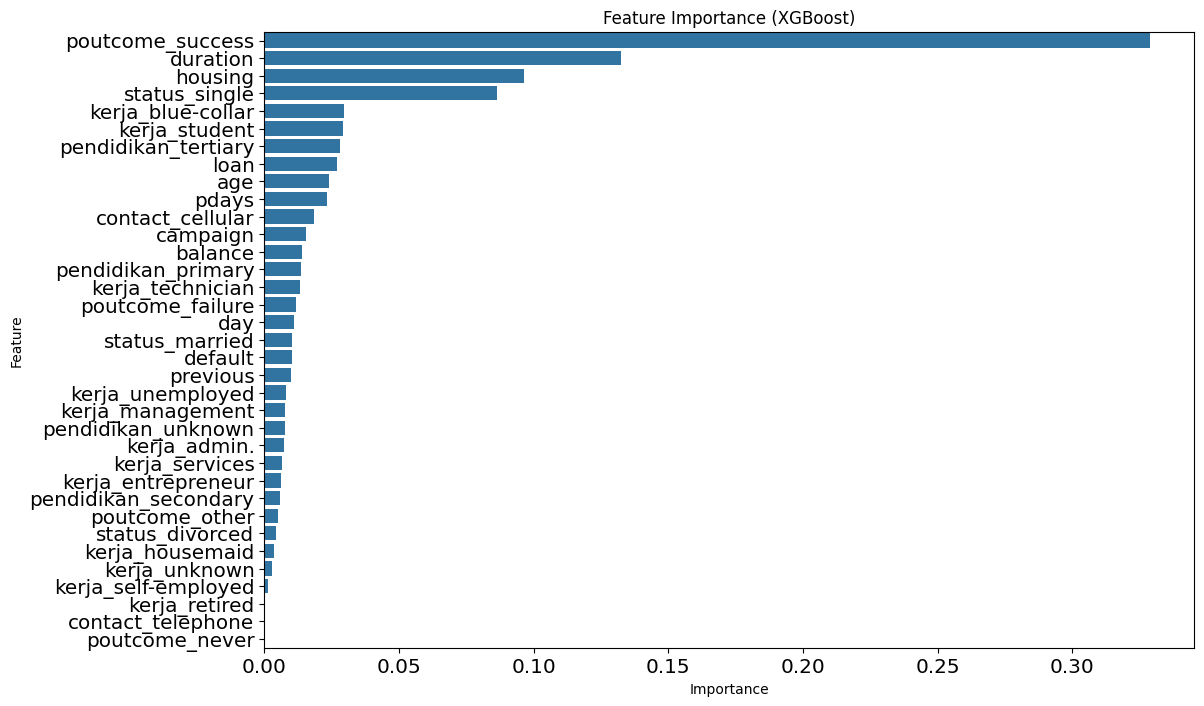

In [ ]:
# Mendapatkan feature importance dari model XGBoost terbaik
feature_importance_xgb = best_model_xgb.feature_importances_

# Membuat DataFrame untuk lebih mudah diproses
feature_importance_df_xgb = pd.DataFrame({'Feature': X_train_combined.columns, 'Importance': feature_importance_xgb})

# Mengurutkan DataFrame berdasarkan importance secara descending
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Menampilkan feature importance
print("Feature Importance (XGBoost):")
print(feature_importance_df_xgb)

# Visualisasi feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb)
plt.title('Feature Importance (XGBoost)')
plt.savefig('fi.png')
plt.show()

In [ ]:
# Mendapatkan feature importance dari model terbaik
feature_importance_xgb = best_model_xgb.feature_importances_

# Membuat DataFrame untuk lebih mudah diproses
feature_importance_df_xgb = pd.DataFrame({'Feature': X_train_combined.columns, 'Importance': feature_importance_xgb})

# Mengurutkan DataFrame berdasarkan importance secara descending
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Buang fitur dengan importance di bawah 0.025
selected_features = feature_importance_df_xgb[feature_importance_df_xgb['Importance'] >= 0.030]['Feature'].tolist()
X_train_combined_selected = X_train_combined[selected_features]
X_test_combined_selected = X_test_combined[selected_features]

# Hyperparameter Tuning untuk XGBoost setelah fitur selection
param_grid_xgb_selected = {'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 9]}
grid_search_xgb_selected = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb_selected, cv=5)
grid_search_xgb_selected.fit(X_train_combined_selected, y_train_binary_xgb)

best_params_xgb_selected = grid_search_xgb_selected.best_params_

print(f'Best Hyperparameters for XGBoost after Feature Selection: {best_params_xgb_selected}')

# Melatih model XGBoost dengan hyperparameter terbaik setelah fitur selection
best_model_xgb_selected = grid_search_xgb_selected.best_estimator_
best_model_xgb_selected.fit(X_train_combined_selected, y_train_binary_xgb)

# Evaluasi model XGBoost setelah hyperparameter tuning dan fitur selection
y_pred_train_xgb_selected = best_model_xgb_selected.predict(X_train_combined_selected)
y_pred_test_xgb_selected = best_model_xgb_selected.predict(X_test_combined_selected)

# AUC Score untuk data train setelah fitur selection
y_pred_proba_train_xgb_selected = best_model_xgb_selected.predict_proba(X_train_combined_selected)[:, 1]
auc_train_xgb_selected = roc_auc_score(y_train_binary_xgb, y_pred_proba_train_xgb_selected)

# AUC Score untuk data test setelah fitur selection
y_pred_proba_test_xgb_selected = best_model_xgb_selected.predict_proba(X_test_combined_selected)[:, 1]
auc_test_xgb_selected = roc_auc_score(y_test_binary_xgb, y_pred_proba_test_xgb_selected)

# Evaluasi metrik pada data train setelah fitur selection
accuracy_train_xgb_selected = accuracy_score(y_train_binary_xgb, y_pred_train_xgb_selected)
classification_report_train_xgb_selected = classification_report(y_train_binary_xgb, y_pred_train_xgb_selected)

# Evaluasi metrik pada data test setelah fitur selection
accuracy_test_xgb_selected = accuracy_score(y_test_binary_xgb, y_pred_test_xgb_selected)
classification_report_test_xgb_selected = classification_report(y_test_binary_xgb, y_pred_test_xgb_selected)

# Menampilkan hasil evaluasi setelah fitur selection
print('XGBoost Evaluation after Feature Selection:\n' + "-"*50 + '\n')
print(f'Train Accuracy: {accuracy_train_xgb_selected:.2f}\nTrain Classification Report:\n{classification_report_train_xgb_selected}\n')
print(f'Test Accuracy: {accuracy_test_xgb_selected:.2f}\nTest Classification Report:\n{classification_report_test_xgb_selected}\n')
print(f'Train AUC Score: {auc_train_xgb_selected:.2f}\nTest AUC Score: {auc_test_xgb_selected:.2f}\n' + "="*70 + '\n')

Best Hyperparameters for XGBoost after Feature Selection: {'max_depth': 3, 'n_estimators': 200}
XGBoost Evaluation after Feature Selection:
--------------------------------------------------

Train Accuracy: 0.90
Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31599
           1       0.66      0.35      0.45      4229

    accuracy                           0.90     35828
   macro avg       0.79      0.66      0.70     35828
weighted avg       0.89      0.90      0.89     35828


Test Accuracy: 0.90
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7925
           1       0.63      0.34      0.44      1032

    accuracy                           0.90      8957
   macro avg       0.78      0.66      0.69      8957
weighted avg       0.89      0.90      0.89      8957


Train AUC Score: 0.88
Test AUC Score: 0.86



In [ ]:
# Evaluasi model XGBoost sebelum hyperparameter tuning pada data test
y_pred_test_xgb = best_model_xgb.predict(X_test_combined_scaled)

# Menampilkan hasil evaluasi model XGBoost sebelum hyperparameter tuning pada data test
print(f'XGBoost Evaluation on Test Data before Hyperparameter Tuning:\n')
print(f'Accuracy: {accuracy_score(y_test_numeric, y_pred_test_xgb):.2f}')
print(f'Classification Report:\n{classification_report(y_test_numeric, y_pred_test_xgb)}')

XGBoost Evaluation on Test Data before Hyperparameter Tuning:

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7925
           1       0.62      0.40      0.49      1032

    accuracy                           0.90      8957
   macro avg       0.77      0.68      0.72      8957
weighted avg       0.89      0.90      0.89      8957



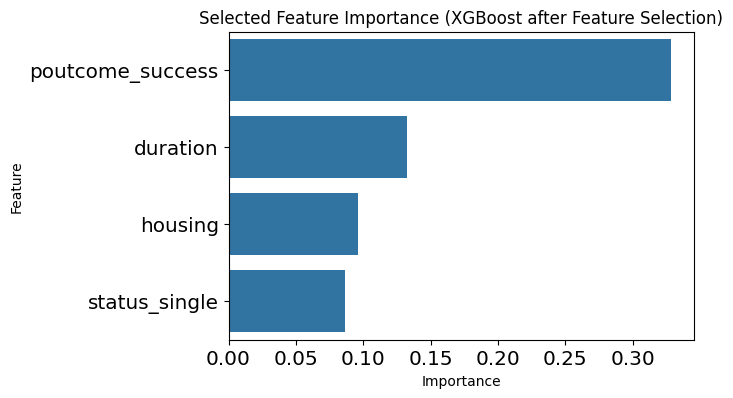

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat DataFrame untuk feature importance setelah pemilihan fitur
selected_feature_importance_df = feature_importance_df_xgb[feature_importance_df_xgb['Importance'] >= 0.030]

# Mengurutkan DataFrame berdasarkan importance secara descending
selected_feature_importance_df = selected_feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=selected_feature_importance_df)
plt.title('Selected Feature Importance (XGBoost after Feature Selection)')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import datetime

# Fungsi untuk menghitung jumlah pelanggan yang dapat dihubungi per hari
def calculate_customers_per_day(call_duration, effective_hours, officers_count):
    return (effective_hours * 60) // call_duration * officers_count

# Fungsi untuk melakukan simulasi panggilan kampanye
def campaign_simulation(data, call_duration, officers_count, start_date, end_date, effective_hours):
    # Menghitung jumlah pelanggan yang dapat dihubungi per hari
    customers_per_day = calculate_customers_per_day(call_duration, effective_hours, officers_count)

    # Membuat kolom baru untuk tanggal panggilan
    data['call_date'] = np.random.choice(pd.date_range(start_date, end_date, freq='D'), len(data))

    # Menentukan pelanggan yang akan dihubungi setiap hari
    contacted_customers = data.groupby('call_date').apply(lambda x: x.sample(customers_per_day)).reset_index(drop=True)

    return contacted_customers[['call_date', 'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]

# Asumsi-asumsi
call_duration = 5  # Durasi panggilan dalam menit
effective_hours = 7  # Jam operasional bank dalam sehari
officers_count = 1  # Jumlah Marketing Officer
start_date = '2022-11-01'
end_date = '2022-12-16'

# Menjalankan simulasi panggilan kampanye
simulated_data = campaign_simulation(df, call_duration, officers_count, start_date, end_date, effective_hours)

# Menampilkan hasil simulasi
print(simulated_data.head())


   call_date       age            job  marital  education  balance housing  \
0 2022-11-01  3.332205         admin.   single  secondary     -181     yes   
1 2022-11-01  3.401197  self-employed  married    primary      674     yes   
2 2022-11-01  3.891820     unemployed  married  secondary     8399      no   
3 2022-11-01  3.871201    blue-collar  married  secondary     1143     yes   
4 2022-11-01  3.637586         admin.  married  secondary     3632     yes   

  loan   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  yes  cellular    7   may       429  0.693147    343         4  failure  no  
1   no  cellular   21   nov        72  0.693147     -1         0    never  no  
2   no  cellular   19   nov       596  0.693147     -1         0    never  no  
3   no  cellular   20   aug        93  1.098612     -1         0    never  no  
4  yes  cellular   13   may       323  0.000000     -1         0    never  no  


In [ ]:
# Filtering data asli
filtered_original_data = simulated_data

# Filtering data hasil simulasi
filtered_simulated_data = simulated_data[
    (simulated_data['poutcome'] == 'success') &
    (simulated_data['duration'] > 240) &
    (simulated_data['housing'] == 'no') &
    (simulated_data['marital'].isin(['married', 'divorced']))
]

# Perbandingan jumlah data antara data asli dan hasil simulasi
print("Jumlah Data Asli setelah Filtering:", len(filtered_original_data))
print("Jumlah Data Hasil Simulasi setelah Filtering:", len(filtered_simulated_data))

# Menampilkan 5 data pertama dari kedua dataframe
print("\nData Asli setelah Filtering:")
print(filtered_original_data.head())

print("\nData Hasil Simulasi setelah Filtering:")
print(filtered_simulated_data.head())

Jumlah Data Asli setelah Filtering: 3864
Jumlah Data Hasil Simulasi setelah Filtering: 33

Data Asli setelah Filtering:
   call_date       age            job  marital  education  balance housing  \
0 2022-11-01  3.332205         admin.   single  secondary     -181     yes   
1 2022-11-01  3.401197  self-employed  married    primary      674     yes   
2 2022-11-01  3.891820     unemployed  married  secondary     8399      no   
3 2022-11-01  3.871201    blue-collar  married  secondary     1143     yes   
4 2022-11-01  3.637586         admin.  married  secondary     3632     yes   

  loan   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  yes  cellular    7   may       429  0.693147    343         4  failure  no  
1   no  cellular   21   nov        72  0.693147     -1         0    never  no  
2   no  cellular   19   nov       596  0.693147     -1         0    never  no  
3   no  cellular   20   aug        93  1.098612     -1         0    never  no  
4  yes  cel

In [ ]:
# Hitung persentase nilai y = yes pada Data Asli
percentage_original_data = (filtered_original_data['y'].value_counts(normalize=True) * 100).loc['yes']

# Hitung persentase nilai y = yes pada Data Hasil Simulasi
percentage_simulated_data = (filtered_simulated_data['y'].value_counts(normalize=True) * 100).loc['yes']

print(f"Persentase nilai y = 'yes' pada Data Asli: {percentage_original_data:.2f}%")
print(f"Persentase nilai y = 'yes' pada Data Hasil Simulasi: {percentage_simulated_data:.2f}%")

Persentase nilai y = 'yes' pada Data Asli: 12.34%
Persentase nilai y = 'yes' pada Data Hasil Simulasi: 69.70%


In [ ]:
simulated_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,3.684943,1387.829193,15.608954,263.029762,0.679938,43.644669,0.641563
std,0.255747,2795.716555,8.236727,262.410963,0.674425,103.448984,4.749390
min,2.944439,-2082.000000,1.000000,4.000000,0.000000,-1.000000,0.000000
25%,3.496508,79.000000,8.000000,104.000000,0.000000,-1.000000,0.000000
50%,3.663562,480.500000,16.000000,182.000000,0.693147,-1.000000,0.000000
75%,3.891820,1522.000000,21.000000,324.000000,1.098612,-1.000000,0.000000
max,4.442651,56831.000000,31.000000,3284.000000,2.833213,842.000000,275.000000


In [ ]:
# Membuat kolom baru 'model_result' berdasarkan prediksi dari model XGBoost
X_test_combined_selected['model_result'] = best_model_xgb_selected.predict(X_test_combined_selected)

# Menampilkan beberapa baris pertama dari DataFrame dengan kolom 'model_result'
print(X_test_combined_selected[['model_result']].head())

# Membandingkan nilai "yes" dari model dengan "yes" pada data asli
comparison_df = pd.DataFrame({'Actual': y_test_binary_xgb, 'Model_Prediction': X_test_combined_selected['model_result']})

# Menampilkan beberapa baris pertama dari DataFrame perbandingan
print(comparison_df.head())

       model_result
1864              0
36097             0
3548              1
35615             0
22787             0
       Actual  Model_Prediction
1864        0                 0
36097       0                 0
3548        1                 1
35615       0                 0
22787       0                 0


<ipython-input-66-b6df3fe0b0c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_combined_selected['model_result'] = best_model_xgb_selected.predict(X_test_combined_selected)


In [ ]:
# Menghitung perbandingan nilai "yes" per total populasi pada data asli
actual_yes_ratio = y_test_binary_xgb.sum() / len(y_test_binary_xgb)

# Menghitung perbandingan nilai "yes" per total populasi pada hasil model
model_yes_ratio = X_test_combined_selected['model_result'].sum() / len(X_test_combined_selected['model_result'])

# Menampilkan hasil perbandingan
print(f"Actual 'yes' ratio per total populasi: {actual_yes_ratio:.4f}")
print(f"Model 'yes' ratio per total populasi: {model_yes_ratio:.4f}")

Actual 'yes' ratio per total populasi: 0.1152
Model 'yes' ratio per total populasi: 0.0619
